In [2]:
# Import Skcit-Learn methods we want to use in this notebook
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
# Import useful Libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [40]:
saving_path_combined_csv='/content/drive/MyDrive/Asad data/covid-19 /world population/final_ratioed.csv'

In [43]:
df=pd.read_csv(saving_path_combined_csv)
df

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40314623.0,1.113437
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40314623.0,1.166676
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40314623.0,1.181623
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40314623.0,1.189077
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40314623.0,1.189578
...,...,...,...,...,...,...,...,...,...,...
26618,26618,Zimbabwe,ZWE,2021-12-22,7167610.0,4078945.0,3088665.0,14,15214555.0,26.809493
26619,26619,Zimbabwe,ZWE,2021-12-23,7188128.0,4089315.0,3098813.0,9,15214555.0,26.877651
26620,26620,Zimbabwe,ZWE,2021-12-24,7200776.0,4095685.0,3105091.0,27,15214555.0,26.919519
26621,26621,Zimbabwe,ZWE,2021-12-25,7209049.0,4100069.0,3108980.0,16,15214555.0,26.948333


Coefficients: -1.0314425941285448
Intercept: 76.54486438021644


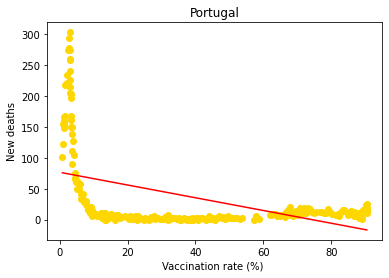

In [44]:
# We put the data from Portugal in the mydf variable .
mydf = df[df.country == "Portugal"]
# Create an object to build a linear regression model from Scikit-Learn Library. 
regr = linear_model.LinearRegression()
# We define training variables via Numpy in arrays .
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])
# Using fit(x, y) method of Scikit-Learn object, we fit the model on the training variables.
regr.fit (train_x, train_y)
# The coefficients and Intercept of this Simple Linear Regression
print(f'Coefficients: {regr.coef_[0][0]}')
print(f'Intercept: {regr.intercept_[0]}')
# Now it is time to draw the line we want using Coefficients and Intercept. 
plt.scatter(mydf.ratio, mydf.New_deaths,  color='gold') 
XX = train_x
YY = regr.intercept_[0] + regr.coef_[0][0]*train_x   # y = Intercept + (Coeff * VaccinationRate)
# Plotting Regression Line
plt.plot(XX, YY, color='red')
plt.title("Portugal")
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

In [45]:
def plot_vaccine_mortality(country_name, df, degree=2):
    """
    This function receives the dataset and the name of the country and dgree then divides
    data into two parts the [test] and [train]. And a polynomial regression model applies to 
    training data.Then evaluate the model using test data and prints the results. 
    how to use:
    >>> plot_vaccine_mortality("Italy", df, 8)
    """
    #---------------------------
    print(f"{country_name:-^80}")
    # Store country data in a variable 
    mydf = df[df.country == country_name]
    # Divide data randomly into two test and training sections 
    msk = np.random.rand(len(mydf)) < .8
    train = mydf[msk]
    test = mydf[~msk]
    # Identify the dependent(y) and independent variables(x) in the train dataframe
    train_x = np.asanyarray(train[['ratio']])
    train_y = np.asanyarray(train[['New_deaths']])
    # Identify the dependent(y) and non-dependent(x) variables in the test dataframe
    test_x = np.asanyarray(train[['ratio']])
    test_y = np.asanyarray(train[['New_deaths']])
    # Generate polynomial and interaction features Object with our desired degree  
    poly = PolynomialFeatures(degree=degree)
    # In this section, we make a number of variables with different degrees from 
    # independent variables(x) to use them in a multiple regression model.
    train_x_poly = poly.fit_transform(train_x)
    # Make the model 
    clf = linear_model.LinearRegression()
    train_y_ = clf.fit(train_x_poly, train_y)
    # Print The coefficients
    print ('Coefficients: ')
    for i, c in enumerate(clf.coef_[0]):
        if i: print(f"{c:->22.10f} * X^{i}")
    # Print The Intercept    
    print ('Intercept: ',clf.intercept_[0])
    # Constructing a scatterplot using train data with random color
    plt.scatter(train.ratio, train.New_deaths,  color= np.random.rand(3,))
    # Set the X axis using numpy:   np.arange(start, end, interval)
    XX = np.arange(train_x[0], train_x[-1], 0.1)
    # Set the Y axis using intercept and coefficients that we found in previous steps
    YY = clf.intercept_[0] 
    for d in range(1,degree+1):
        YY += clf.coef_[0][d]*np.power(XX, d)
    # On the previous scatterplot, we fit the regression model with red color. 
    plt.plot(XX, YY, '-r' )
    plt.title(country_name)
    plt.xlabel("Vaccination rate (%) ")
    plt.ylabel("New deaths")
    plt.show()
    # Now it's time to evaluate the model we build 
    # Calculate Predicted values by this model
    test_x_poly = poly.fit_transform(test_x)
    predict_y = clf.predict(test_x_poly)
    # Using Predicted values to mesure Error of this model
    # Mean absolute error
    MAE = np.mean(np.absolute(predict_y - test_y))  
    print(f"Mean absolute error: {MAE:.2f}")
    # Mean squared error
    MSE =  np.mean((predict_y - test_y) ** 2)
    print(f"Residual sum of squares (MSE): {MSE:.2f}")
    # R2-score
    r2 = r2_score(test_y, predict_y)
    print(f"R2-score: {r2:.2f}")
    #---------------------------
    print("-"*80)

------------------------------------Portugal------------------------------------
Coefficients: 
----------5.2014920358 * X^1
----------0.0466640186 * X^2
Intercept:  122.08636514856707


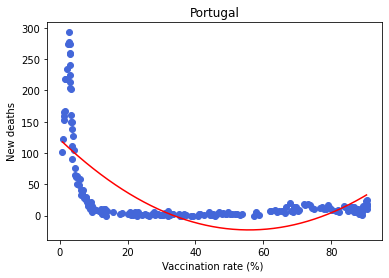

Mean absolute error: 34.85
Residual sum of squares (MSE): 2343.27
R2-score: 0.47
--------------------------------------------------------------------------------


In [46]:
plot_vaccine_mortality("Portugal", df, 2)

------------------------------------Portugal------------------------------------
Coefficients: 
---------37.6928802172 * X^1
----------1.9303464435 * X^2
----------0.0438105465 * X^3
----------0.0004547342 * X^4
----------0.0000017593 * X^5
Intercept:  250.53346816553602


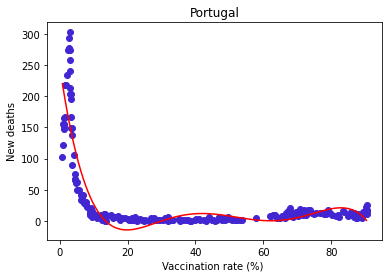

Mean absolute error: 18.84
Residual sum of squares (MSE): 982.89
R2-score: 0.78
--------------------------------------------------------------------------------


In [49]:
plot_vaccine_mortality("Portugal", df, 5)

------------------------------------Portugal------------------------------------
Coefficients: 
---------54.1757187107 * X^1
----------3.6132769264 * X^2
----------0.1153767236 * X^3
----------0.0018924460 * X^4
----------0.0000152463 * X^5
----------0.0000000462 * X^6
----------0.0000000000 * X^7
Intercept:  297.79250410126826


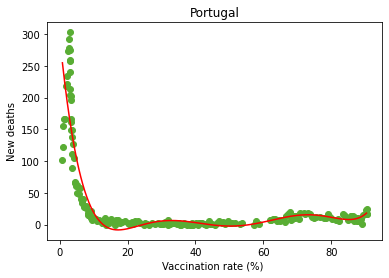

Mean absolute error: 14.67
Residual sum of squares (MSE): 891.81
R2-score: 0.81
--------------------------------------------------------------------------------


In [53]:
plot_vaccine_mortality("Portugal", df, 7)

------------------------------------Portugal------------------------------------
Coefficients: 
----------0.8842875334 * X^1
----------5.3560096520 * X^2
----------0.5567646439 * X^3
----------0.0244562750 * X^4
----------0.0005641125 * X^5
----------0.0000071457 * X^6
----------0.0000000471 * X^7
----------0.0000000001 * X^8
Intercept:  199.71827085261418


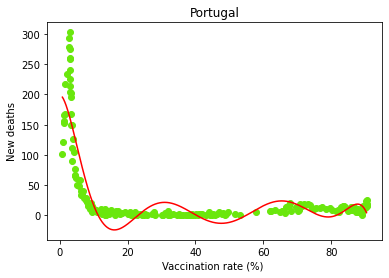

Mean absolute error: 21.31
Residual sum of squares (MSE): 986.48
R2-score: 0.78
--------------------------------------------------------------------------------


In [51]:
plot_vaccine_mortality("Portugal", df, 8)

------------------------------------Portugal------------------------------------
Coefficients: 
----------0.0006749896 * X^1
----------0.0000849686 * X^2
----------0.0010271770 * X^3
----------0.0072923989 * X^4
----------0.0006953093 * X^5
----------0.0000272592 * X^6
----------0.0000005616 * X^7
----------0.0000000064 * X^8
----------0.0000000000 * X^9
----------0.0000000000 * X^10
Intercept:  112.37465363329564


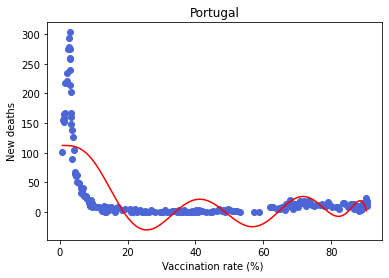

Mean absolute error: 31.98
Residual sum of squares (MSE): 2357.28
R2-score: 0.48
--------------------------------------------------------------------------------


In [52]:
plot_vaccine_mortality("Portugal", df, 10)

**Can be seen that the R2 score doesnt improve with the increament of polynomials from 7 to 10. so 7 describes the 81% of variance in the data**

**let do it for Pakistan, because why not**

------------------------------------Pakistan------------------------------------
Coefficients: 
----------0.1858546859 * X^1
----------0.7939200580 * X^2
----------1.6413792389 * X^3
----------0.4227958678 * X^4
----------0.0437339346 * X^5
----------0.0024535938 * X^6
----------0.0000815851 * X^7
----------0.0000016163 * X^8
----------0.0000000177 * X^9
----------0.0000000001 * X^10
Intercept:  93.32646183259422


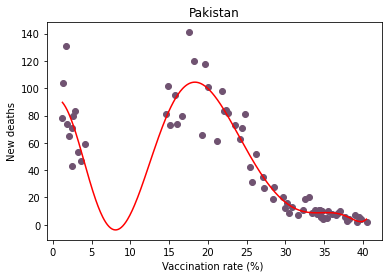

Mean absolute error: 8.09
Residual sum of squares (MSE): 159.95
R2-score: 0.89
--------------------------------------------------------------------------------


In [54]:
plot_vaccine_mortality("Pakistan", df, 10)